In [56]:

# %%file requirements.txt
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier
)
from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    # confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    # plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
# from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime

import os

ImportError: cannot import name 'LGBMClassifier' from 'sklearn.ensemble' (/home/tranquochung/.local/lib/python3.10/site-packages/sklearn/ensemble/__init__.py)

In [4]:
DATA_PHASE1_FOLDER = "../data/phase-1"
DATA_PROB1_FOLDER = os.path.join(DATA_PHASE1_FOLDER, "prob-1")
DATA_PROB2_FOLDER = os.path.join(DATA_PHASE1_FOLDER, "prob-2")

PARQUET_PROB1 = os.path.join(DATA_PROB1_FOLDER, "raw_train.parquet")
PARQUET_PROB2 = os.path.join(DATA_PROB2_FOLDER, "raw_train.parquet")

CSV_PROB1     = os.path.join(DATA_PROB1_FOLDER, "prob1.csv")
CSV_PROB2     = os.path.join(DATA_PROB2_FOLDER, "prob2.csv")

In [6]:
import pyarrow.parquet as pq

df1 = pq.read_table(source=PARQUET_PROB1).to_pandas()
df2 = pq.read_table(source=PARQUET_PROB2).to_pandas()

df1.to_csv(CSV_PROB1, index=False)
df1.to_csv(CSV_PROB2, index=False)

This note book is focus on modeling the problem 1

In [7]:
# read prob1 data 
df1 = pd.read_csv(CSV_PROB1)

In [8]:
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
0,Site engineer,grocery_pos,8.600,48230,40.213,-85.204,47583,42.508,-83.168,65.596,3,5,1,1,8.018,1.029,58.911
1,Site engineer,gas_transport,316.840,48230,44.379,-82.860,47583,42.662,-81.967,64.729,6,5,1,1,11.769,1.106,64.431
2,Site engineer,grocery_pos,294.890,48230,42.951,-84.936,47583,42.580,-82.409,65.435,3,5,1,1,7.996,0.900,57.545
3,Site engineer,shopping_net,831.080,48230,39.372,-84.894,47583,41.949,-83.920,64.990,23,6,1,1,8.768,1.063,62.681
4,Site engineer,health_fitness,1063.840,48230,41.227,-83.228,47583,41.545,-82.123,65.316,23,6,1,1,8.816,0.722,63.084


# data of problem 1 contain :

- no missing data

- label : 0, 1
- 2 categorical features : feature 1 and feature 2
- 14 numerical  features : 
    - 3 ordinal features : feature11, feature12, feature13
    - 11 numercials features : -scale these feature


Dealing with categorical features:

- fill the NaN values 
- convert them to intergers by applying  label encoding using LabelEncoder of scikit-learn or by
using a mapping dictionary
- Create one-hot encoding 

In [9]:
df1.shape

(134201, 17)

In [10]:
# spliting data set into training dataset, validation dataset and testing dataset

test_size = 0.2
val_size  = 0.25
seed      = 1
loss_func = "logloss"

X,y = df1.drop(columns=["label"]), df1["label"]

for col in X.select_dtypes(include='object').columns.tolist():
        X[col] = X[col].astype('category')

# then we split the temporary set into train and validation
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)


# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (80520, 16) 

Validation Data Shape: 

 (26840, 16) 

Testing Data Shape: 

 (26841, 16)


In [11]:
# Downsampling data

def undersampling_data():
  rus = RandomUnderSampler(random_state=1)
  return rus


X_train_down, y_train_down = undersampling_data().fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_down == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_down == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_down.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_down.shape))


Before Under Sampling, counts of label 'Yes': 5098
Before Under Sampling, counts of label 'No': 75422 

After Under Sampling, counts of label 'Yes': 5098
After Under Sampling, counts of label 'No': 5098 

After Under Sampling, the shape of train_X: (10196, 16)
After Under Sampling, the shape of train_y: (10196,) 



# Data preprocessing

Pre-processing steps:

- Drop feature 1 and feature 2 as it's job and job sector related, which is not the cause for fraud transaction based on job titles. (bias factors) or one hot encoding these two features 1 and 2 (optional).


- Data Split into Dependent and Target sets

- Data Split to Train, Test and Validation sets Standardize feature names

- Missing Value/Incorrect Value treatment

- Encoding Scaling/Outlier treatment

In [12]:
# %%file data_preprocessing.py
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns
def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_



# Building a function to drop features
def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_



# Building a function to treat incorrect value
def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_



# Building a custom imputer
def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_



# Building a custom data preprocessing class with fit and transform methods for standardizing column names
class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    


# Building a custom data preprocessing class with fit and transform methods for dropping columns
class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking
class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    


# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    

    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


In [13]:

def preprocessing_data(X_train, X_val, X_test, is_one_hot=False):
    
    X_train_prep = X_train.copy()
    X_val_prep   = X_val.copy()
    X_test_prep  = X_test.copy()
  
    # To Standardize feature names
    feature_name_standardizer = FeatureNamesStandardizer()
  
    X_train_prep = feature_name_standardizer.fit_transform(X_train_prep)
    X_val_prep   = feature_name_standardizer.transform(X_val_prep)
    X_test_prep  = feature_name_standardizer.transform(X_test_prep)


    # To impute categorical Nulls to Unknown
    cat_columns = X_train.select_dtypes(include="category").columns.tolist()
    imputer = FillUnknown()
    X_train_prep[cat_columns] = imputer.fit_transform(X_train_prep[cat_columns])
    X_val_prep[cat_columns] = imputer.transform(X_val_prep[cat_columns])
    X_test_prep[cat_columns] = imputer.transform(X_test_prep[cat_columns])


    # To encode the data
    if (is_one_hot and len(cat_columns) > 0):
        one_hot = PandasOneHot()
        X_train_prep = one_hot.fit_transform(X_train_prep)
        X_val_prep = one_hot.transform(X_val_prep)
        X_test_prep = one_hot.transform(X_test_prep)
    else:
        # drop cat features
        X_train_prep = X_train_prep.drop(columns=cat_columns)
        X_val_prep   = X_val_prep.drop(columns=cat_columns)
        X_test_prep  = X_test_prep.drop(columns=cat_columns)

    # Scale the numerical columns
    robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
    num_columns = [
            "feature3",
            "feature4",
            "feature5",
            "feature6",
            "feature7",
            "feature8",
            "feature9",
            "feature10",
            "feature11",
            "feature12",
            "feature13",
            "feature14",
            "feature15",
            "feature16"
        ]

    X_train_prep[num_columns] = pd.DataFrame(
        robust_scaler.fit_transform(X_train_prep[num_columns]),
        columns=num_columns,
        index=X_train_prep.index,
    )
    X_val_prep[num_columns] = pd.DataFrame(
        robust_scaler.transform(X_val_prep[num_columns]), columns=num_columns, index=X_val_prep.index
    )
    X_test_prep[num_columns] = pd.DataFrame(
        robust_scaler.transform(X_test_prep[num_columns]),
        columns=num_columns,
        index=X_test_prep.index,
    )

    return X_train_prep, X_val_prep, X_test_prep

In [14]:
X_train_prep, X_val_prep, X_test_prep = preprocessing_data(X_train=X_train, X_val=X_val, X_test=X_test)
print(
    "Training data shape: \n\n",
    X_train_prep.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val_prep.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test_prep.shape,
)

Training data shape: 

 (80520, 14) 

Validation Data Shape: 

 (26840, 14) 

Testing Data Shape: 

 (26841, 14)


In [31]:
X_train_down_prep, X_val_down_prep, X_test_down_prep = preprocessing_data(X_train=X_train, X_val=X_val, X_test=X_test, is_one_hot=True)
print(
    "Training data shape: \n\n",
    X_train_down_prep.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val_down_prep.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test_down_prep.shape,
)

Training data shape: 

 (80520, 507) 

Validation Data Shape: 

 (26840, 503) 

Testing Data Shape: 

 (26841, 502)


# Take a quick look what is the feature important of the model

[0.25392103 0.01262567 0.01076862 0.01288504 0.01220414 0.01091055
 0.01231231 0.02566626 0.06665281 0.01917479 0.06503984 0.01214875
 0.41637436 0.0693159 ]


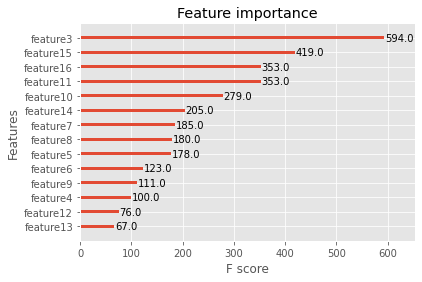

In [15]:
from matplotlib import pyplot
from xgboost import plot_importance

# print importance features
model = XGBClassifier(seed=seed)
model.fit(X_train_prep, y_train)
print(model.feature_importances_)

# plot
plot_importance(model)
pyplot.show()

[0.14353701 0.00590705 0.00541278 0.00526762 0.00562068 0.00571379
 0.00603621 0.01345344 0.0403496  0.01030734 0.03699221 0.00511712
 0.25097677 0.0384928  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00268271 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00345304 0.         0.         0.         0.00322029 0.
 0.         0.         0.00275662 0.         0.         0.
 0.00568922 0.         0.         0.         0.         0.
 0.00403933 0.         0.         0.         0.         0.
 0.         0.         0.0020853  0.         0.         0.
 0.         0.         0.         0.         0.         0.0084267
 0.         0.00079812 0.00315558 0.         0.         0.
 0.         0.         0.00186483

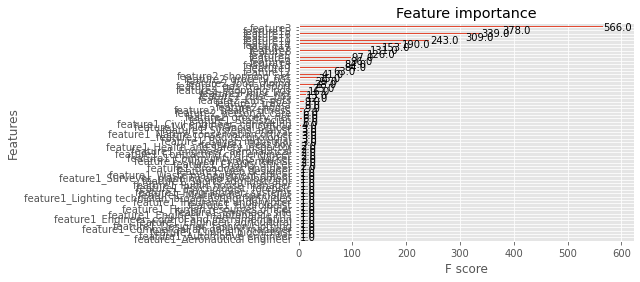

In [32]:
from matplotlib import pyplot
from xgboost import plot_importance

# print importance features
model = XGBClassifier(seed=seed)
model.fit(X_train_down_prep, y_train)
print(model.feature_importances_)

# plot
plot_importance(model)
pyplot.show()

In [33]:
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection import  mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.

def select_features():
    return SelectFromModel(estimator= AdaBoostClassifier(random_state=seed))

sfm_selector = select_features()
sfm_selector.fit(X_train_down_prep, y_train)

cols = X_train_down_prep.columns[sfm_selector.get_support()].to_list()
cols

['feature3',
 'feature11',
 'feature12',
 'feature13',
 'feature15',
 'feature16',
 'feature1_Engineer, aeronautical',
 'feature1_Engineer, agricultural',
 'feature1_Farm manager',
 'feature1_Statistician',
 'feature1_Systems analyst',
 'feature2_gas_transport',
 'feature2_grocery_pos',
 'feature2_misc_net',
 'feature2_shopping_net']

In [53]:
def feature_selections(X_, y_, model):
    model_selector = SelectFromModel(estimator=model)
    model_selector.fit(X_, y_)
    cols = X_.columns[model_selector.get_support()].to_list()
    return cols

In [58]:
# before one hot
models = [LogisticRegression(random_state=seed),
         AdaBoostClassifier(random_state=seed),
         XGBClassifier(seed=seed),
        lgb.LGBMClassifier(random_state=seed)]

for model in models:
    print(feature_selections(X_train_prep, y_train, model=model), "\n") 

['feature15', 'feature16'] 

['feature3', 'feature11', 'feature15', 'feature16'] 

['feature3', 'feature15'] 

['feature3', 'feature10', 'feature11', 'feature15', 'feature16'] 



In [55]:
# after one hot
models = [AdaBoostClassifier(random_state=seed),
         XGBClassifier(seed=seed)]

for model in models:
    print(feature_selections(X_train_down_prep, y_train, model=model), "\n") 

AdaBoostClassifier(random_state=1)
['feature3', 'feature11', 'feature12', 'feature13', 'feature15', 'feature16', 'feature1_Engineer, aeronautical', 'feature1_Engineer, agricultural', 'feature1_Farm manager', 'feature1_Statistician', 'feature1_Systems analyst', 'feature2_gas_transport', 'feature2_grocery_pos', 'feature2_misc_net', 'feature2_shopping_net'] 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
            